In [118]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
import pickle
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanAbsoluteError
import warnings
from scipy.optimize import curve_fit
from tensorflow.keras.layers import Dense, Activation, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.models import Sequential
warnings.filterwarnings('ignore')


In [119]:
onlyvalues = pd.read_csv('./finalvalues.csv')

In [120]:
data = onlyvalues

In [121]:
data.head()

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,exponential,1.840000e-05,36.449848,-6.474227e+06,0.0,0.0,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,exponential,7.660774e+03,6.413528,5.816923e+10,0.0,0.0,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,exponential,1.345378e-01,6.251730,9.942353e+05,0.0,0.0,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,exponential,8.760000e-07,30.731920,-7.455532e+03,0.0,0.0,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,exponential,5.194179e-02,9.582162,8.669050e+05,0.0,0.0,7.167766e+03,9483.627267,0.254804,2.122948


In [122]:
data['unloading_fit'].value_counts()

exponential    2970
linear         1304
Name: unloading_fit, dtype: int64

# Dataset

In [123]:
data.isnull().sum()

a_L                             0
b_L                             0
c_L                             0
unloading_fit                   0
a_UL                            0
b_UL                            0
c_UL                            0
d_UL                            0
e_UL                            0
Loading Plasticity Value        0
Unloading Plasticity            0
Coefficient Plasticity Depth    0
Coefficient Adhesion            0
dtype: int64

In [124]:
data = data.iloc[:,:13]

In [125]:
data.isnull().sum()

a_L                             0
b_L                             0
c_L                             0
unloading_fit                   0
a_UL                            0
b_UL                            0
c_UL                            0
d_UL                            0
e_UL                            0
Loading Plasticity Value        0
Unloading Plasticity            0
Coefficient Plasticity Depth    0
Coefficient Adhesion            0
dtype: int64

# mapping

In [126]:
mapping = {'linear': 1, 'exponential': 0}
data['unloading_fit'] = data['unloading_fit'].map(mapping)

# Loading Phase

#Loading (a,b,c)

In [127]:
X = data[['Loading Plasticity Value','Unloading Plasticity','Coefficient Plasticity Depth','Coefficient Adhesion']]

In [128]:
y = data[['a_L','b_L','c_L']]

In [129]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [130]:
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

In [131]:
X_aux, X_test, y_aux, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_aux, y_aux, test_size=0.10, random_state=42)

In [132]:
# Create a Sequential model
abc_model = Sequential()

# Add the second hidden layer with 64 nodes and ELU activation
abc_model.add(Dense(64, activation='relu'))
abc_model.add(LayerNormalization(axis=-1))  # Add layer normalization directly

# Add the third hidden layer with 32 nodes and ELU activation
abc_model.add(Dense(32, activation='relu'))
abc_model.add(LayerNormalization(axis=-1))  # Add layer normalization directly

# Add the output layer with 3 nodes and linear activation
abc_model.add(Dense(3, activation='linear'))

# Create an Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile your model with the specified optimizer and Huber loss function
abc_model.compile(optimizer=optimizer, loss=Huber())

# Print the model summary
# model.summary()


Epoch 1/250
97/97 [==============================] - 4s 8ms/step - loss: 0.6582 - val_loss: 0.4091
Epoch 2/250
97/97 [==============================] - 0s 5ms/step - loss: 0.3290 - val_loss: 0.2483
Epoch 3/250
97/97 [==============================] - 1s 7ms/step - loss: 0.2442 - val_loss: 0.2060
Epoch 4/250
97/97 [==============================] - 1s 6ms/step - loss: 0.2128 - val_loss: 0.1845
Epoch 5/250
97/97 [==============================] - 1s 6ms/step - loss: 0.1943 - val_loss: 0.1708
Epoch 6/250
97/97 [==============================] - 1s 7ms/step - loss: 0.1814 - val_loss: 0.1602
Epoch 7/250
97/97 [==============================] - 0s 5ms/step - loss: 0.1710 - val_loss: 0.1519
Epoch 8/250
97/97 [==============================] - 0s 4ms/step - loss: 0.1620 - val_loss: 0.1446
Epoch 9/250
97/97 [==============================] - 0s 4ms/step - loss: 0.1545 - val_loss: 0.1388
Epoch 10/250
97/97 [==============================] - 0s 5ms/step - loss: 0.1479 - val_loss: 0.1339
Epoch 11/

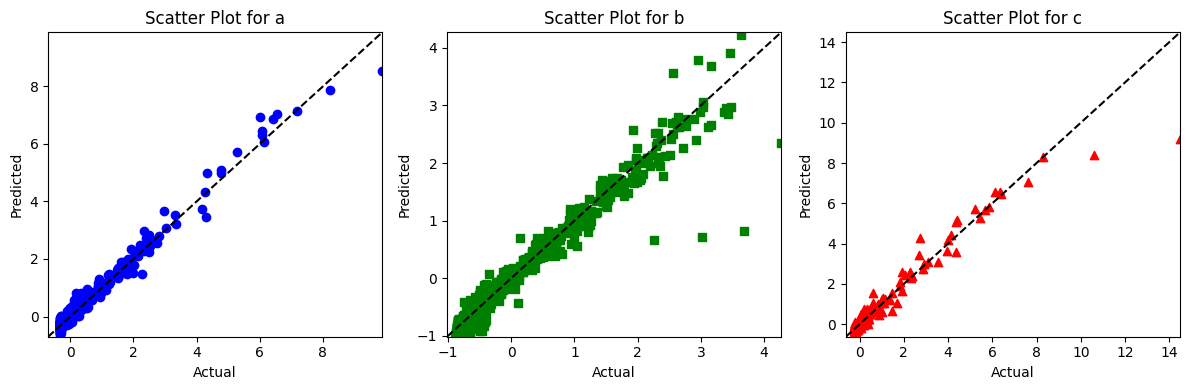

In [133]:
# Create an instance of the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
abc_model.fit(X_train, y_train, epochs=250, batch_size = 32, validation_data=(X_val, y_val))
y_pred = abc_model.predict(X_test)
# Extract the elements a, b, and c from y_pred and y_test
a_pred = y_pred[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_pred = y_pred[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_pred = y_pred[:, 2]  # Replace 2 with the appropriate column index for 'c'

a_test = y_test.values[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_test = y_test.values[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_test = y_test.values[:, 2]  # Replace 2 with the appropriate column index for 'c'

# Create scatter plots for a, b, and c
plt.figure(figsize=(12, 4))

# Scatter plot for 'a'
plt.subplot(131)
x_min_a = min(a_test.min(), a_pred.min())
x_max_a = max(a_test.max(), a_pred.max())
plt.scatter(a_test, a_pred, c='b', marker='o')
plt.plot([x_min_a, x_max_a], [x_min_a, x_max_a], 'k--')  # Diagonal line
plt.xlim(x_min_a, x_max_a)
plt.ylim(x_min_a, x_max_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for a')

# Scatter plot for 'b'
plt.subplot(132)
x_min_b = min(b_test.min(), b_pred.min())
x_max_b = max(b_test.max(), b_pred.max())
plt.scatter(b_test, b_pred, c='g', marker='s')
plt.plot([x_min_b, x_max_b], [x_min_b, x_max_b], 'k--')  # Diagonal line
plt.xlim(x_min_b, x_max_b)
plt.ylim(x_min_b, x_max_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for b')

# Scatter plot for 'c'
plt.subplot(133)
x_min_c = min(c_test.min(), c_pred.min())
x_max_c = max(c_test.max(), c_pred.max())
plt.scatter(c_test, c_pred, c='r', marker='^')
plt.plot([x_min_c, x_max_c], [x_min_c, x_max_c], 'k--')  # Diagonal line
plt.xlim(x_min_c, x_max_c)
plt.ylim(x_min_c, x_max_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for c')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [134]:
y_pred_inverse = scaler.inverse_transform(y_pred)

In [135]:
y_test_inverse = scaler.inverse_transform(y_test)

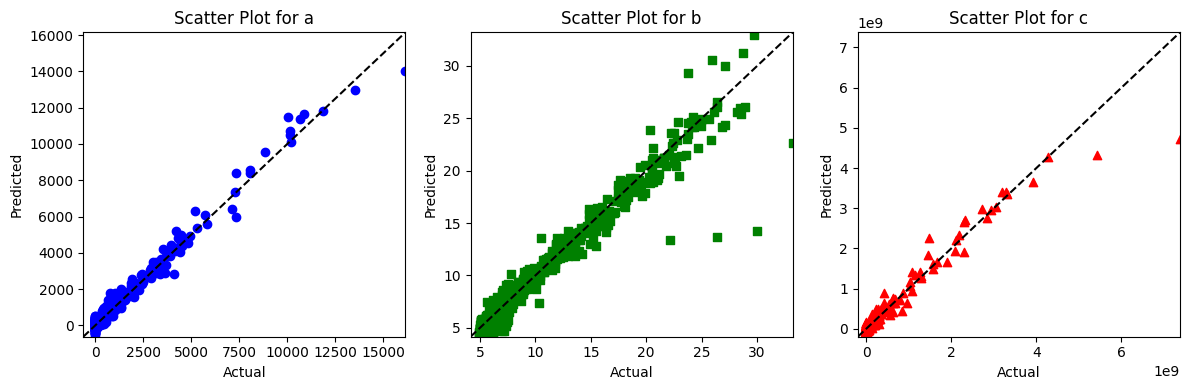

In [137]:
# Extract the elements a, b, and c from y_pred and y_test
a_pred = y_pred_inverse[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_pred = y_pred_inverse[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_pred = y_pred_inverse[:, 2]  # Replace 2 with the appropriate column index for 'c'

a_test = y_test_inverse[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_test = y_test_inverse[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_test = y_test_inverse[:, 2]  # Replace 2 with the appropriate column index for 'c'

# Create scatter plots for a, b, and c
plt.figure(figsize=(12, 4))

# Scatter plot for 'a'
plt.subplot(131)
x_min_a = min(a_test.min(), a_pred.min())
x_max_a = max(a_test.max(), a_pred.max())
plt.scatter(a_test, a_pred, c='b', marker='o')
plt.plot([x_min_a, x_max_a], [x_min_a, x_max_a], 'k--')  # Diagonal line
plt.xlim(x_min_a, x_max_a)
plt.ylim(x_min_a, x_max_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for a')

# Scatter plot for 'b'
plt.subplot(132)
x_min_b = min(b_test.min(), b_pred.min())
x_max_b = max(b_test.max(), b_pred.max())
plt.scatter(b_test, b_pred, c='g', marker='s')
plt.plot([x_min_b, x_max_b], [x_min_b, x_max_b], 'k--')  # Diagonal line
plt.xlim(x_min_b, x_max_b)
plt.ylim(x_min_b, x_max_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for b')

# Scatter plot for 'c'
plt.subplot(133)
x_min_c = min(c_test.min(), c_pred.min())
x_max_c = max(c_test.max(), c_pred.max())
plt.scatter(c_test, c_pred, c='r', marker='^')
plt.plot([x_min_c, x_max_c], [x_min_c, x_max_c], 'k--')  # Diagonal line
plt.xlim(x_min_c, x_max_c)
plt.ylim(x_min_c, x_max_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for c')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [138]:
# Calculate MSE for each output
mse_per_output = mean_squared_error(y_test_inverse, y_pred_inverse, multioutput='raw_values')

# Calculate RMSE for each output
rmse_per_output = np.sqrt(mse_per_output)

# Calculate MAE for each output
mae_per_output = mean_absolute_error(y_test_inverse, y_pred_inverse, multioutput='raw_values')

# Print the results
for i in range(len(mse_per_output)):
    print(f"Output {i+1}:")
    print(f"MSE: {mse_per_output[i]}")
    print(f"RMSE: {rmse_per_output[i]}")
    print(f"MAE: {mae_per_output[i]}")
    print()

Output 1:
MSE: 46137.88311913483
RMSE: 214.79730705745553
MAE: 121.10367637191453

Output 2:
MSE: 1.2887679995817938
RMSE: 1.1352391816625225
MAE: 0.5457862200100106

Output 3:
MSE: 1.451072670411266e+16
RMSE: 120460477.76807404
MAE: 44424750.85762642



In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate MSE for all outputs
mse_whole_model = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate RMSE for all outputs
rmse_whole_model = np.sqrt(mse_whole_model)

# Calculate MAE for all outputs
mae_whole_model = mean_absolute_error(y_test_inverse, y_pred_inverse)

# Print the results
print(f"Whole Model Metrics:")
print(f"MSE: {mse_whole_model}")
print(f"RMSE: {rmse_whole_model}")
print(f"MAE: {mae_whole_model}")

Whole Model Metrics:
MSE: 4836908901386267.0
RMSE: 69547889.26621905
MAE: 14808290.83569634


In [140]:
import numpy as np
import tensorflow as tf

# Calculate the residuals (observed - predicted)
residuals = y_test_inverse - y_pred_inverse

# Calculate the residual sum of squares (RSS)
rss = np.sum(residuals**2)

# Calculate the number of parameters in your ANN model
num_parameters = sum([tf.reduce_prod(var.shape) for var in abc_model.trainable_variables])

# Calculate the log-likelihood
log_likelihood = -0.5 * (len(y_test) * np.log(2 * np.pi) + len(y_test) * np.log(rss / len(y_test)))

# Calculate AIC and BIC
aic = 2 * num_parameters - 2 * log_likelihood
bic = len(y_test) * np.log(2 * np.pi) + len(y_test) * np.log(rss / len(y_test)) + num_parameters * np.log(len(y_test))

print("AIC:")
print(aic)
print("\nBIC:")
print(bic)

AIC:
tf.Tensor(38771, shape=(), dtype=int32)

BIC:
tf.Tensor(49535, shape=(), dtype=int32)


# Exponential Unloading

In [141]:
data = pd.read_csv('./finalvalues.csv')

In [144]:
mapping = {'linear': 1, 'exponential': 0}
data['unloading_fit'] = data['unloading_fit'].map(mapping)

In [145]:
df = data[data['unloading_fit'] == 0][['Loading Plasticity Value', 'Unloading Plasticity', 'Coefficient Plasticity Depth', 'Coefficient Adhesion', 'a_UL', 'b_UL', 'c_UL']]

In [146]:
X = df[['Loading Plasticity Value', 'Unloading Plasticity', 'Coefficient Plasticity Depth', 'Coefficient Adhesion']]
y = df[['a_UL', 'b_UL', 'c_UL']]

In [147]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

In [148]:
X_aux, X_test, y_aux, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_aux, y_aux, test_size=0.10, random_state=42)

In [149]:
abc_ul_model = Sequential()
abc_ul_model.add(Dense(64, activation='relu'))
abc_ul_model.add(LayerNormalization(axis=-1))

abc_ul_model.add(Dense(32, activation='relu'))
abc_ul_model.add(LayerNormalization(axis=-1))

abc_ul_model.add(Dense(3, activation='linear'))
optimizer = Adam(learning_rate=0.0001)

abc_ul_model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_absolute_error)

In [158]:
# Fit the model with early stopping
abc_ul_model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/400
67/67 [==============================] - 1s 8ms/step - loss: 0.0594 - val_loss: 0.0805
Epoch 2/400
67/67 [==============================] - 1s 9ms/step - loss: 0.0594 - val_loss: 0.0804
Epoch 3/400
67/67 [==============================] - 1s 8ms/step - loss: 0.0590 - val_loss: 0.0798
Epoch 4/400
67/67 [==============================] - 1s 10ms/step - loss: 0.0593 - val_loss: 0.0806
Epoch 5/400
67/67 [==============================] - 1s 9ms/step - loss: 0.0588 - val_loss: 0.0798
Epoch 6/400
67/67 [==============================] - 0s 5ms/step - loss: 0.0584 - val_loss: 0.0801
Epoch 7/400
67/67 [==============================] - 0s 4ms/step - loss: 0.0584 - val_loss: 0.0789
Epoch 8/400
67/67 [==============================] - 0s 5ms/step - loss: 0.0584 - val_loss: 0.0786
Epoch 9/400
67/67 [==============================] - 0s 5ms/step - loss: 0.0584 - val_loss: 0.0808
Epoch 10/400
67/67 [==============================] - 0s 4ms/step - loss: 0.0581 - val_loss: 0.0780
Epoch 11

19/19 [==============================] - 0s 2ms/step


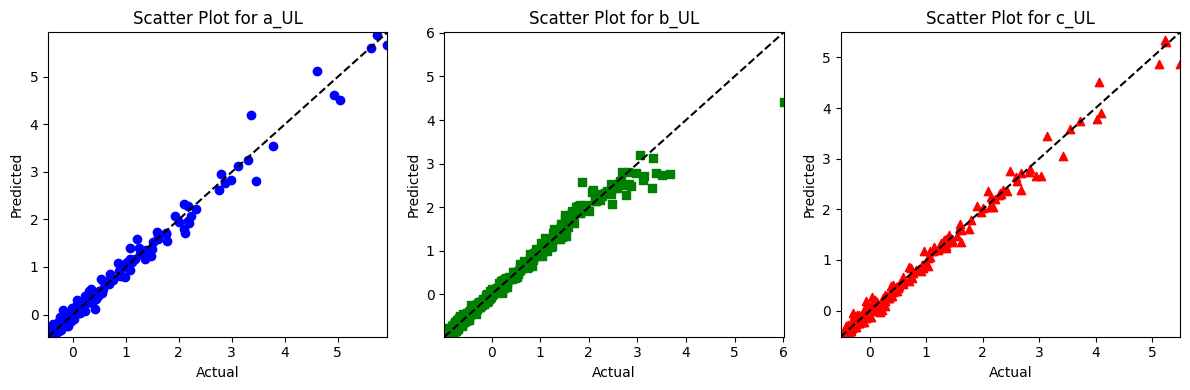

In [159]:
y_pred = abc_ul_model.predict(X_test)
# Extract the elements a, b, and c from y_pred and y_test
a_pred = y_pred[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_pred = y_pred[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_pred = y_pred[:, 2]  # Replace 2 with the appropriate column index for 'c'

a_test = y_test.values[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_test = y_test.values[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_test = y_test.values[:, 2]  # Replace 2 with the appropriate column index for 'c'

# Create scatter plots for a, b, and c
plt.figure(figsize=(12, 4))

# Scatter plot for 'a'
plt.subplot(131)
x_min_a = min(a_test.min(), a_pred.min())
x_max_a = max(a_test.max(), a_pred.max())
plt.scatter(a_test, a_pred, c='b', marker='o')
plt.plot([x_min_a, x_max_a], [x_min_a, x_max_a], 'k--')  # Diagonal line
plt.xlim(x_min_a, x_max_a)
plt.ylim(x_min_a, x_max_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for a_UL')

# Scatter plot for 'b'
plt.subplot(132)
x_min_b = min(b_test.min(), b_pred.min())
x_max_b = max(b_test.max(), b_pred.max())
plt.scatter(b_test, b_pred, c='g', marker='s')
plt.plot([x_min_b, x_max_b], [x_min_b, x_max_b], 'k--')  # Diagonal line
plt.xlim(x_min_b, x_max_b)
plt.ylim(x_min_b, x_max_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for b_UL')

# Scatter plot for 'c'
plt.subplot(133)
x_min_c = min(c_test.min(), c_pred.min())
x_max_c = max(c_test.max(), c_pred.max())
plt.scatter(c_test, c_pred, c='r', marker='^')
plt.plot([x_min_c, x_max_c], [x_min_c, x_max_c], 'k--')  # Diagonal line
plt.xlim(x_min_c, x_max_c)
plt.ylim(x_min_c, x_max_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for c_UL')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [160]:
y_pred_inverse = scaler.inverse_transform(y_pred)

In [161]:
y_test_inverse = scaler.inverse_transform(y_test)

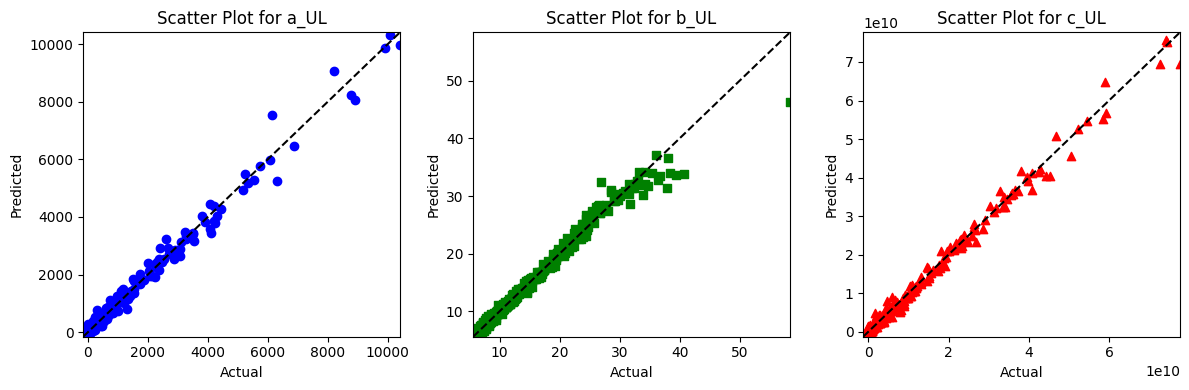

In [162]:
# Extract the elements a, b, and c from y_pred and y_test
a_pred = y_pred_inverse[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_pred = y_pred_inverse[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_pred = y_pred_inverse[:, 2]  # Replace 2 with the appropriate column index for 'c'

a_test = y_test_inverse[:, 0]  # Replace 0 with the appropriate column index for 'a'
b_test = y_test_inverse[:, 1]  # Replace 1 with the appropriate column index for 'b'
c_test = y_test_inverse[:, 2]  # Replace 2 with the appropriate column index for 'c'

# Create scatter plots for a, b, and c
plt.figure(figsize=(12, 4))

# Scatter plot for 'a'
plt.subplot(131)
x_min_a = min(a_test.min(), a_pred.min())
x_max_a = max(a_test.max(), a_pred.max())
plt.scatter(a_test, a_pred, c='b', marker='o')
plt.plot([x_min_a, x_max_a], [x_min_a, x_max_a], 'k--')  # Diagonal line
plt.xlim(x_min_a, x_max_a)
plt.ylim(x_min_a, x_max_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for a_UL')

# Scatter plot for 'b'
plt.subplot(132)
x_min_b = min(b_test.min(), b_pred.min())
x_max_b = max(b_test.max(), b_pred.max())
plt.scatter(b_test, b_pred, c='g', marker='s')
plt.plot([x_min_b, x_max_b], [x_min_b, x_max_b], 'k--')  # Diagonal line
plt.xlim(x_min_b, x_max_b)
plt.ylim(x_min_b, x_max_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for b_UL')

# Scatter plot for 'c'
plt.subplot(133)
x_min_c = min(c_test.min(), c_pred.min())
x_max_c = max(c_test.max(), c_pred.max())
plt.scatter(c_test, c_pred, c='r', marker='^')
plt.plot([x_min_c, x_max_c], [x_min_c, x_max_c], 'k--')  # Diagonal line
plt.xlim(x_min_c, x_max_c)
plt.ylim(x_min_c, x_max_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for c_UL')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [163]:
# Calculate MSE for each output
mse_per_output = mean_squared_error(y_test_inverse, y_pred_inverse, multioutput='raw_values')

# Calculate RMSE for each output
rmse_per_output = np.sqrt(mse_per_output)

# Calculate MAE for each output
mae_per_output = mean_absolute_error(y_test_inverse, y_pred_inverse, multioutput='raw_values')

# Print the results
for i in range(len(mse_per_output)):
    print(f"Output {i+1}:")
    print(f"MSE: {mse_per_output[i]}")
    print(f"RMSE: {rmse_per_output[i]}")
    print(f"MAE: {mae_per_output[i]}")
    print()

Output 1:
MSE: 20018.99118840943
RMSE: 141.48848429610598
MAE: 72.30600868915674

Output 2:
MSE: 0.9124994898578147
RMSE: 0.955248391706479
MAE: 0.4512480423421426

Output 3:
MSE: 8.489330729399252e+17
RMSE: 921375641.6033176
MAE: 506584446.82892925



In [164]:
# Calculate MSE for all outputs
mse_whole_model = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate RMSE for all outputs
rmse_whole_model = np.sqrt(mse_whole_model)

# Calculate MAE for all outputs
mae_whole_model = mean_absolute_error(y_test_inverse, y_pred_inverse)

# Print the results
print(f"Whole Model Metrics:")
print(f"MSE: {mse_whole_model}")
print(f"RMSE: {rmse_whole_model}")
print(f"MAE: {mae_whole_model}")

Whole Model Metrics:
MSE: 2.8297769097998173e+17
RMSE: 531956474.70444584
MAE: 168861506.52872866


In [165]:
import numpy as np
import tensorflow as tf

# Calculate the residuals (observed - predicted)
residuals = y_test_inverse - y_pred_inverse

# Calculate the residual sum of squares (RSS)
rss = np.sum(residuals**2)

# Calculate the number of parameters in your ANN model
num_parameters = sum([tf.reduce_prod(var.shape) for var in abc_ul_model.trainable_variables])

# Calculate the log-likelihood
log_likelihood = -0.5 * (len(y_test) * np.log(2 * np.pi) + len(y_test) * np.log(rss / len(y_test)))

# Calculate AIC and BIC
aic = 2 * num_parameters - 2 * log_likelihood
bic = len(y_test) * np.log(2 * np.pi) + len(y_test) * np.log(rss / len(y_test)) + num_parameters * np.log(len(y_test))

print("AIC:")
print(aic)
print("\nBIC:")
print(bic)

AIC:
tf.Tensor(30995, shape=(), dtype=int32)

BIC:
tf.Tensor(41759, shape=(), dtype=int32)


# Linear Unloading



In [225]:
data = pd.read_csv('./finalvalues.csv')

In [226]:
data.head()

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,exponential,1.840000e-05,36.449848,-6.474227e+06,0.0,0.0,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,exponential,7.660774e+03,6.413528,5.816923e+10,0.0,0.0,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,exponential,1.345378e-01,6.251730,9.942353e+05,0.0,0.0,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,exponential,8.760000e-07,30.731920,-7.455532e+03,0.0,0.0,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,exponential,5.194179e-02,9.582162,8.669050e+05,0.0,0.0,7.167766e+03,9483.627267,0.254804,2.122948


In [227]:
mapping = {'linear': 1, 'exponential': 0}
data['unloading_fit'] = data['unloading_fit'].map(mapping)

In [228]:
df = data[data['unloading_fit'] == 1][['Loading Plasticity Value', 'Unloading Plasticity', 'Coefficient Plasticity Depth', 'Coefficient Adhesion', 'd_UL', 'e_UL']]

In [229]:
X = df[['Loading Plasticity Value', 'Unloading Plasticity', 'Coefficient Plasticity Depth', 'Coefficient Adhesion']]
y = df[['d_UL','e_UL']]

In [230]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

In [231]:
X_aux, X_test, y_aux, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_aux, y_aux, test_size=0.10, random_state=42)

In [232]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(LayerNormalization(axis=-1))

model.add(Dense(32, activation='relu'))
model.add(LayerNormalization(axis=-1))

model.add(Dense(2, activation='linear'))
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_absolute_error)

In [233]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/500
30/30 [==============================] - 2s 11ms/step - loss: 1.2601 - val_loss: 1.0773
Epoch 2/500
30/30 [==============================] - 0s 5ms/step - loss: 1.0392 - val_loss: 0.8894
Epoch 3/500
30/30 [==============================] - 0s 5ms/step - loss: 0.8557 - val_loss: 0.7304
Epoch 4/500
30/30 [==============================] - 0s 5ms/step - loss: 0.7155 - val_loss: 0.6239
Epoch 5/500
30/30 [==============================] - 0s 5ms/step - loss: 0.6158 - val_loss: 0.5554
Epoch 6/500
30/30 [==============================] - 0s 5ms/step - loss: 0.5477 - val_loss: 0.5102
Epoch 7/500
30/30 [==============================] - 0s 5ms/step - loss: 0.5030 - val_loss: 0.4788
Epoch 8/500
30/30 [==============================] - 0s 6ms/step - loss: 0.4698 - val_loss: 0.4552
Epoch 9/500
30/30 [==============================] - 0s 5ms/step - loss: 0.4440 - val_loss: 0.4324
Epoch 10/500
30/30 [==============================] - 0s 5ms/step - loss: 0.4234 - val_loss: 0.4170
Epoch 11

9/9 [==============================] - 0s 3ms/step


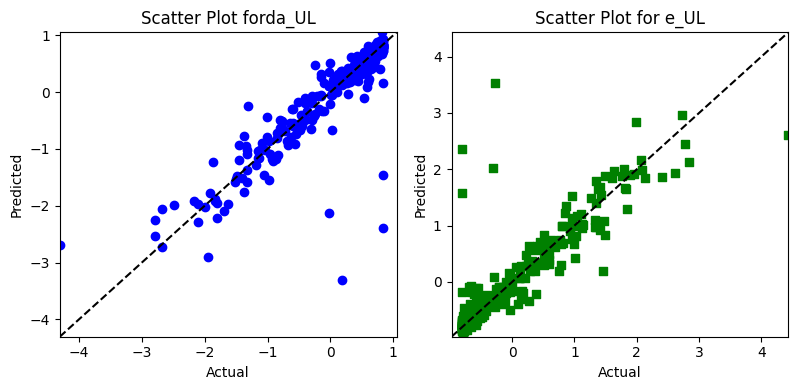

In [234]:
y_pred = model.predict(X_test)
# Extract the elements a, b, and c from y_pred and y_test
d_pred = y_pred[:, 0]  # Replace 0 with the appropriate column index for 'a'
e_pred = y_pred[:, 1]  # Replace 1 with the appropriate column index for 'b'

d_test = y_test.values[:, 0]  # Replace 0 with the appropriate column index for 'a'
e_test = y_test.values[:, 1]  # Replace 1 with the appropriate column index for 'b'

# Create scatter plots for a, b, and c
plt.figure(figsize=(12, 4))

# Scatter plot for 'a'
plt.subplot(131)
x_min_d = min(d_test.min(), d_pred.min())
x_max_d = max(d_test.max(), d_pred.max())
plt.scatter(d_test, d_pred, c='b', marker='o')
plt.plot([x_min_d, x_max_d], [x_min_d, x_max_d], 'k--')  # Diagonal line
plt.xlim(x_min_d, x_max_d)
plt.ylim(x_min_d, x_max_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot forda_UL')

# Scatter plot for 'b'
plt.subplot(132)
x_min_e = min(e_test.min(), e_pred.min())
x_max_e = max(e_test.max(), e_pred.max())
plt.scatter(e_test, e_pred, c='g', marker='s')
plt.plot([x_min_e, x_max_e], [x_min_e, x_max_e], 'k--')  # Diagonal line
plt.xlim(x_min_e, x_max_e)
plt.ylim(x_min_e, x_max_e)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for e_UL')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [235]:
y_pred_inverse = scaler.inverse_transform(y_pred)

In [236]:
y_test_inverse = scaler.inverse_transform(y_test)

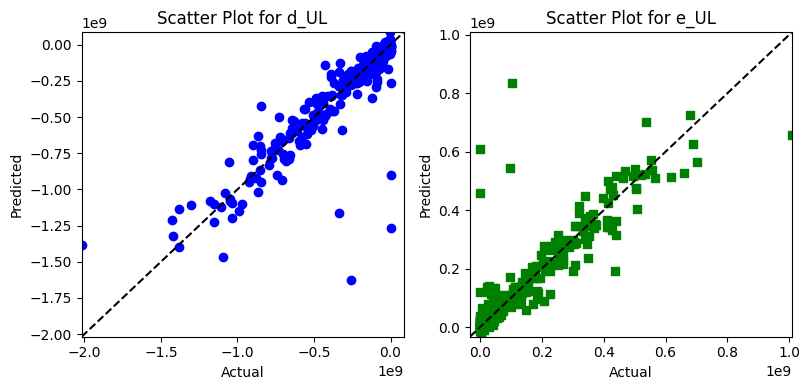

In [237]:
# Extract the elements a, b, and c from y_pred and y_test
d_pred = y_pred_inverse[:, 0]  # Replace 0 with the appropriate column index for 'a'
e_pred = y_pred_inverse[:, 1]  # Replace 1 with the appropriate column index for 'b'

d_test = y_test_inverse[:, 0]  # Replace 0 with the appropriate column index for 'a'
e_test = y_test_inverse[:, 1]  # Replace 1 with the appropriate column index for 'b'

# Create scatter plots for a, b, and c
plt.figure(figsize=(12, 4))

# Scatter plot for 'a'
plt.subplot(131)
x_min_d = min(d_test.min(), d_pred.min())
x_max_d = max(d_test.max(), d_pred.max())
plt.scatter(d_test, d_pred, c='b', marker='o')
plt.plot([x_min_d, x_max_d], [x_min_d, x_max_d], 'k--')  # Diagonal line
plt.xlim(x_min_d, x_max_d)
plt.ylim(x_min_d, x_max_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for d_UL')

# Scatter plot for 'b'
plt.subplot(132)
x_min_e = min(e_test.min(), e_pred.min())
x_max_e = max(e_test.max(), e_pred.max())
plt.scatter(e_test, e_pred, c='g', marker='s')
plt.plot([x_min_e, x_max_e], [x_min_e, x_max_e], 'k--')  # Diagonal line
plt.xlim(x_min_e, x_max_e)
plt.ylim(x_min_e, x_max_e)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for e_UL')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [238]:
# Calculate MSE for each output
mse_per_output = mean_squared_error(y_test_inverse, y_pred_inverse, multioutput='raw_values')

# Calculate RMSE for each output
rmse_per_output = np.sqrt(mse_per_output)

# Calculate MAE for each output
mae_per_output = mean_absolute_error(y_test_inverse, y_pred_inverse, multioutput='raw_values')

# Print the results
for i in range(len(mse_per_output)):
    print(f"Output {i+1}:")
    print(f"MSE: {mse_per_output[i]}")
    print(f"RMSE: {rmse_per_output[i]}")
    print(f"MAE: {mae_per_output[i]}")
    print()

Output 1:
MSE: 2.850065617959508e+16
RMSE: 168821373.5863889
MAE: 78746029.87928213

Output 2:
MSE: 7548647652371729.0
RMSE: 86882953.75027099
MAE: 39651660.31893104



In [239]:
# Calculate MSE for all outputs
mse_whole_model = mean_squared_error(y_test_inverse, y_pred_inverse)

# Calculate RMSE for all outputs
rmse_whole_model = np.sqrt(mse_whole_model)

# Calculate MAE for all outputs
mae_whole_model = mean_absolute_error(y_test_inverse, y_pred_inverse)

# Print the results
print(f"Whole Model Metrics:")
print(f"MSE: {mse_whole_model}")
print(f"RMSE: {rmse_whole_model}")
print(f"MAE: {mae_whole_model}")

Whole Model Metrics:
MSE: 1.8024651915983404e+16
RMSE: 134255919.48209733
MAE: 59198845.09910659


In [240]:
# Calculate the residuals (observed - predicted)
residuals = y_test_inverse - y_pred_inverse
# Calculate the residual sum of squares (RSS)
rss = np.sum(residuals**2)

# Calculate the number of parameters in your ANN model
num_parameters = sum([tf.reduce_prod(var.shape) for var in model.trainable_variables])

# Calculate the log-likelihood
log_likelihood = -0.5 * (len(y_test) * np.log(2 * np.pi) + len(y_test) * np.log(rss / len(y_test)))

# Calculate AIC and BIC
aic = 2 * num_parameters - 2 * log_likelihood
bic = len(y_test) * np.log(2 * np.pi) + len(y_test) * np.log(rss / len(y_test)) + num_parameters * np.log(len(y_test))

print("AIC:")
print(aic)
print("\nBIC:")
print(bic)

AIC:
tf.Tensor(15745, shape=(), dtype=int32)

BIC:
tf.Tensor(23719, shape=(), dtype=int32)


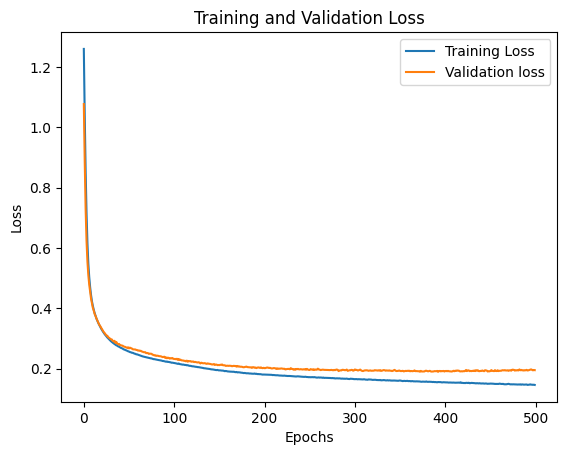

In [241]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Unloading Fit

In [203]:
data = pd.read_csv('finalvalues.csv')

In [204]:
mapping = {'linear': 1, 'exponential': 0}
data['unloading_fit'] = data['unloading_fit'].map(mapping)

In [205]:
X = data[['Loading Plasticity Value', 'Unloading Plasticity', 'Coefficient Plasticity Depth', 'Coefficient Adhesion']]
y = data['unloading_fit']

In [206]:
data.head(3)

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,0,0.000018,36.449848,-6.474227e+06,0.0,0.0,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,0,7660.773701,6.413528,5.816923e+10,0.0,0.0,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,0,0.134538,6.251730,9.942353e+05,0.0,0.0,5.482073e+03,2950.606120,0.073838,3.899846


In [207]:
onlyvalues.head(3)

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,NaN,0.000018,36.449848,-6.474227e+06,0.0,0.0,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,NaN,7660.773701,6.413528,5.816923e+10,0.0,0.0,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,NaN,0.134538,6.251730,9.942353e+05,0.0,0.0,5.482073e+03,2950.606120,0.073838,3.899846


In [208]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [209]:
X_aux, X_test, y_aux, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_aux, y_aux, test_size=0.10, random_state=42)

In [210]:
de_model = Sequential()
de_model.add(Dense(64, activation='relu'))
de_model.add(LayerNormalization(axis=-1))

de_model.add(Dense(64, activation='relu'))
de_model.add(LayerNormalization(axis=-1))

de_model.add(Dense(1, activation='linear'))
optimizer = Adam(learning_rate=0.0001)

de_model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_absolute_error)

In [211]:

# Fit the model with early stopping
history = de_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
97/97 [==============================] - 3s 7ms/step - loss: 1.0897 - val_loss: 0.5430
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3644 - val_loss: 0.2418
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 0.2069 - val_loss: 0.1952
Epoch 4/100
97/97 [==============================] - 0s 5ms/step - loss: 0.1660 - val_loss: 0.1659
Epoch 5/100
97/97 [==============================] - 0s 5ms/step - loss: 0.1409 - val_loss: 0.1455
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 0.1231 - val_loss: 0.1260
Epoch 7/100
97/97 [==============================] - 0s 5ms/step - loss: 0.1098 - val_loss: 0.1106
Epoch 8/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 0.1035
Epoch 9/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 0.1000
Epoch 10/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0861 - val_loss: 0.0912
Epoch 11/

In [212]:
y_pred = de_model.predict(X_test).flatten()

27/27 [==============================] - 0s 2ms/step


In [213]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [214]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9976608187134502
Precision: 0.9962264150943396
Recall: 0.9962264150943396
F1-score: 0.9962264150943396
Confusion Matrix:
[[589   1]
 [  1 264]]
